# Aliasing in the Time- and Frequency  Domains

Original signal $x(t)$ and signal $x[n]$, sampled at $t[n]= nT_s$, $n= 0, 1, 2, \ldots$, where $T_s$ is the sample interval and $f_s = 1/T_s$ is the sample rate. 
\begin{align}
  x(t) &= \cos(2 \pi f_0 t + \phi) &
  x[n] &=  \cos(2 \pi f_0 n T_s) = \cos(\hat\omega_0 n + \phi)  & \hat\omega_0 &= 2 \pi f_0 T_s = 2 \pi \frac{f_0}{f_s}
\end{align}
The sample ponts $x[n]$ will be the same for all normalised frequencies $\hat\omega$ fulfilling
\begin{align}
  \hat\omega &= \hat\omega_0 + 2 \pi n  & &\text{ or } & \hat\omega &=-\hat\omega_0 + 2n \pi & n &= 0, \pm1, \pm2, \pm3, \ldots
\end{align}
When this is converted to linear frequencies, we get that all frequencies $f_a$ will give the same values in the sample points if 
\begin{align}
  f_a &= f_0 + n f_s  & & \text{ or } & f_a &= -f_0 + n f_s 
\end{align}
After the signal has been sampled, there is no way to find out which of the alias frequencies $f_a$ corresponds to the original frequency $f_0$.

The phenomenon is illustrated in the interactive widget below. 

The orange curves represent the original signal. In the frequency plots, all the alias frequencies are shown in blue, while the unique region where $-\tfrac12 f_s \le f \le \tfrac12 f_s$ is illustrated with a green box. One negative and one positive alias frequency will always fall within these limits.

When the signal is reconstructed, the lowest possible frequency is selected. This is the frequency pair that has $|f_a| \le \tfrac12 f_s$, the the pair inside the green box.
This will be the same as the original frequency $f_0$ when $f_0 \le \tfrac12 f_s$. If $f_0$ it is outside this region, the signal will be reconstructed with the alias frequency within the region. 




In [112]:
# Illustrate aliasing in the time- and frequency domains

# Use Matplotlib backend that allows interactive operation
%matplotlib ipympl

from math import pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class AliasSignal():
    """Demonstation of aliasing in the time- and frequency domains.

    All calculations and plotting routines are contained in this class    
    """
    
    def __init__(self, f=0.2, phase=0, fs=1):
        """Initialise signal."""
        self.f = f                          # Original frequency
        self.phase = 0.2                    # Phase [radians]
        self.fs = fs                        # Sample rate
        self.n_alias = np.arange(-10, 10)   # Alias frequency number
        self.n_t = 1000                     # Number of point in time vectors
        self.t_max = 2/self.f               # Length of time axis
        self.ax_time, self.ax_freq = self.initialise_graphs()
        
    def _f_alias(self):
        """Find aliases from positive frequency."""
        return self.f + self.n_alias * self.fs

    def f_all(self):
        """Find the 20 lowest unique aliasing frequencies."""
        fp = self._f_alias()
        fn = -fp      # Add negative aliases
        return np.sort(np.append(fn, fp))

    def fa(self):
        """Principal alias frequency."""
        na = np.argmin(abs(self._f_alias()))   # Index of principal alias
        self._f_alias()[na]                    # Principal alias, signed
        
        return self._f_alias()[na]

    def ti(self):
        """Original time vector."""
        return np.arange(0, self.t_max, 1/(100*self.f))

    def dts(self):
        """Sample time."""
        return 1/self.fs

    def ts(self):
        """Sampled time vector, including entire time vector."""
        return np.arange(0, self.t_max+self.dts()/2, self.dts())

    def original(self):
        """Original signal."""
        return np.cos(2 * pi * self.f * self.ti() + self.phase)

    def sampled(self):
        """Sampled signal."""
        return np.cos(2*pi * self.f * self.ts() + self.phase)

    def reconstructed(self):
        """Reconstructed signal."""
        return np.cos(2 * pi * self.fa() * self.ti() + self.phase)

    def initialise_graphs(self):
        """Initialise graphs for signals and spectra."""
        plt.close("all")
        plt.rc('font', size=8)          # Default text sizes
        fig = plt.figure(figsize=[14, 6], clear=True)
                    
        n_plots = 3
        ax_time = [fig.add_subplot(2, n_plots, k+1) for k in range(n_plots)]
        ax_freq = [fig.add_subplot(2, n_plots, k+1+n_plots) for k in range(n_plots)]

        for k in range(n_plots):
            ax_time[k].set(xlim=(0, 2/self.f),
                           ylim=(-1.1, 1.1),
                           xlabel="Time [s]")
    
            ax_freq[k].set(xlim=(-2*self.fs, 2*self.fs),
                           ylim=(0, 1.1),
                           xlabel="Frequency [Hz]")
            
        return ax_time, ax_freq

    def plot(self):
        """Plot all signals and spectra."""
        # Clear old lines
        for ax in self.ax_time + self.ax_freq:
            for art in list(ax.lines):
                art.remove()
            for art in list(ax.collections):
                art.remove()
            for art in list(ax.patches):
                art.remove()
            
        # Plot time traces
        self.ax_time[0].plot(self.ti(), self.original(), "-", color="C1")
        self.ax_time[1].stem(self.ts(), self.sampled(), linefmt="C0")
        self.ax_time[1].plot(self.ti(), self.original(), "-", color="C1")
        self.ax_time[1].plot(self.ti(), self.reconstructed(), "--", color="C0")
        self.ax_time[2].plot(self.ti(), self.reconstructed(), "-", color="C0")

        # Add titles with values
        self.ax_time[0].set_title(f"Frequency = {self.f:.2f}")
        self.ax_time[1].set_title(f"Sample rate = {self.fs:.2f}")
        self.ax_time[2].set_title(f"Reconstructed frequency = {abs(self.fa()):.2f}")

        # Plot spectra
        self.ax_freq[0].stem([-self.f, self.f], np.ones(2), linefmt="C1")
        self.ax_freq[1].stem(self.f_all(), np.ones(len(self.f_all())), linefmt="C0")
        self.ax_freq[1].stem([-self.f, self.f], np.ones(2), linefmt="C1")
        self.ax_freq[2].stem([-self.fa(), self.fa()], np.ones(2), linefmt="C0")

        # Make box showing Nyquist limits
        for ax in self.ax_freq:
            ax.add_patch(patches.Rectangle((-self.fs/2, 0), # (x,y)
                                           self.fs,        # width
                                           2,              # height
                                           alpha=0.20,     # transparency
                                           color="green"))
        return 0

interactive(children=(FloatSlider(value=0.2, description='Frequency [Hz]', layout=Layout(width='60%'), max=2.0…

<function __main__.run_demo(frequency, phase_deg, sample_rate)>

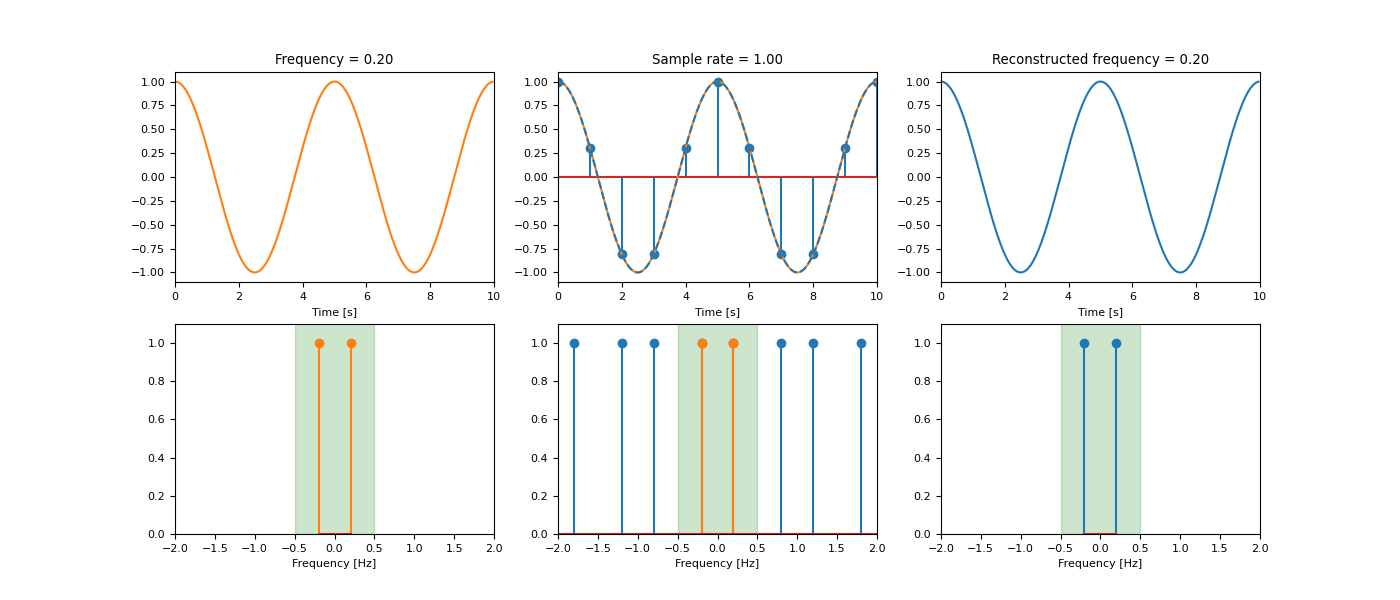

In [115]:
# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_demo(frequency, phase_deg, sample_rate):
    """Set values and call plotting function."""
    x.f = frequency
    x.fs = sample_rate
    x.phase = np.radians(phase_deg)
    x.plot()
    return

# Define signal and run demo
x = AliasSignal()

frequency_widget = widgets.FloatSlider(min= 0.02, max= 2.0, value= 0.2, step=0.01, description='Frequency [Hz]', readout_format='.2f', orientation='horizontal', layout=widgets.Layout(width='60%'))
phase_widget = widgets.FloatSlider(min=-180, max= 180, value=0, step=5, description='Phase [deg]',  orientation='horizontal', layout=widgets.Layout(width='30%'))
sample_rate_widget = widgets.FloatSlider(min=0.2, max= 2, value=1.0, step=0.2, description='Sample rate [1/s]',  orientation='horizontal', layout=widgets.Layout(width='30%'))

widgets.interact(run_demo, frequency=frequency_widget, phase_deg=phase_widget, sample_rate=sample_rate_widget)

# Multiple aliases

In [105]:
# Illustrate aliasing in the time- and frequency domains

# Use Matplotlib backend that allows interactive operation
%matplotlib ipympl

from math import pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class AliasSignal():
    """Demonstation of multiple aliasing frequencies

    All calculations and plotting routines are contained in this class    
    """
    
    def __init__(self, f=0.2, phase=0, fs=1):
        """Initialise signal."""
        self.f = f                          # Original frequency
        self.phase = 0.2                    # Phase [radians]
        self.fs = fs                        # Sample rate
        self.m = 1                          # Positive alias frequency
        self.n = 0                          # Negative  alias frequency
        self.n_t = 1000                     # Number of point in time vectors
        self.t_max = 2/self.f               # Length of time axis
        self.ax = self.initialise_graphs()
        
    def fm(self):
        """Find positive alias of positive frequency."""
        return (self.f + self.m * self.fs)
        
    def fn(self):
        """Find positive alias of positive frequency."""
        return (-self.f + self.n * self.fs)       

    def ti(self):
        """Original time vector."""
        return np.arange(0, self.t_max, 1/(300*self.f))

    def ts(self):
        """Sampled time vector, including entire time vector."""
        return np.arange(0, self.t_max+0.5/self.fs, 1/self.fs)

    def original(self):
        """Original signal."""
        return np.cos(2 * pi * self.f * self.ti() + self.phase)

    def sampled(self):
        """Sampled signal."""
        return np.cos(2*pi * self.f * self.ts() + self.phase)

    def positive(self):
        """Reconstructed signal."""
        return np.cos(2 * pi * self.fm() * self.ti() + self.phase)

    def negative(self):
        """Reconstructed signal."""
        return np.cos(2 * pi * self.fn() * self.ti() + self.phase)

    def initialise_graphs(self):
        """Initialise graphs for signals and spectra."""
        plt.close("all")
        plt.rc('font', size=12) 
        fig = plt.figure(figsize=[12, 6], clear=True)
                    
        n_plots = 3
        ax = fig.add_subplot(1, 1, 1)
        ax.set(xlim=(0, 2/self.f),
                     ylim=(-1.1, 1.1),
                     xlabel="Time [s]")
    
        return ax

    def plot(self):
        """Plot all signals and spectra."""
        # Clear old lines
        for art in list(self.ax.lines):
            art.remove()
        for art in list(self.ax.collections):
             art.remove()
            
        # Plot time traces
        self.ax.stem(self.ts(), self.sampled(), linefmt="C0")
        if self.m != 0:
            self.ax.plot(self.ti(), self.positive(), "-", color="C1", label=f"f = {self.fm():.2f} Hz")
        if self.n != 0:
            self.ax.plot(self.ti(), self.negative(), "-", color="C2", label=f"f = {self.fn():.2f} Hz")
        self.ax.plot(self.ti(), self.original(), "-", color="C0", label=f"f = {self.f:.2f} Hz")

        self.ax.legend(loc="upper right") 

        return 0

interactive(children=(FloatSlider(value=0.2, description='Frequency [Hz]', layout=Layout(width='40%'), max=2.0…

<function __main__.run_demo(frequency, phase_deg, sample_rate, m, n)>

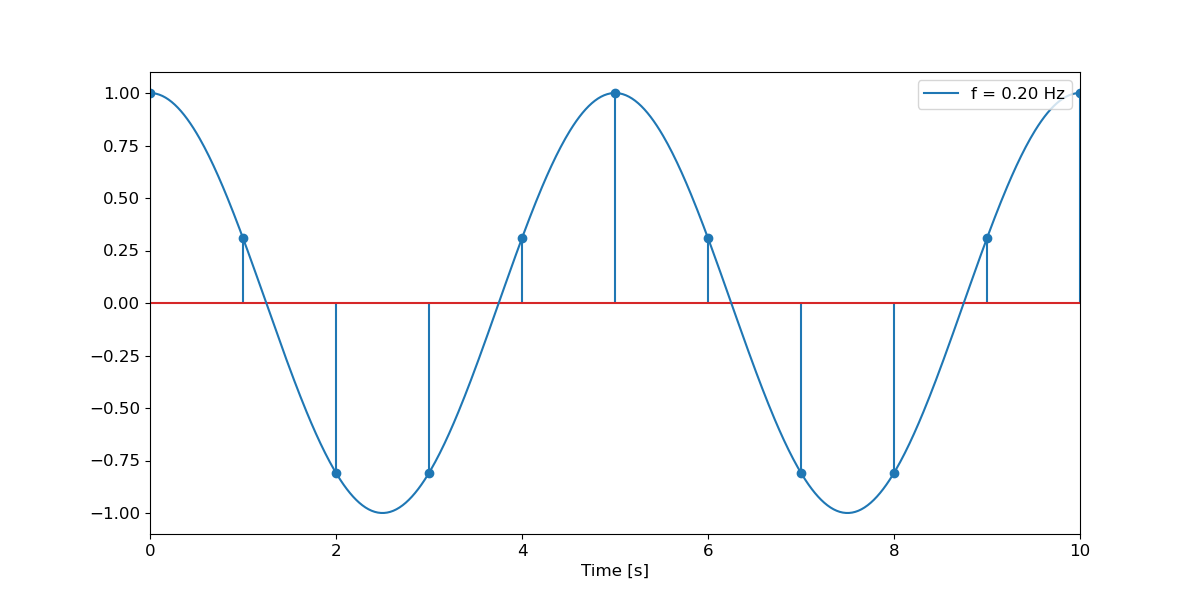

In [109]:
# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_demo(frequency, phase_deg, sample_rate, m, n):
    """Set values and call plotting function."""
    x.f = frequency
    x.fs = sample_rate
    x.phase = np.radians(phase_deg)
    x.m = m
    x.n = n
    x.plot()
    return

# Define signal and run demo
x = AliasSignal()

frequency_widget = widgets.FloatSlider(min= 0.02, max= 2.0, value= 0.2, step=0.01, description='Frequency [Hz]', readout_format='.2f', orientation='horizontal', layout=widgets.Layout(width='40%'))
phase_widget = widgets.FloatSlider(min=-180, max= 180, value=0, step=5, description='Phase [deg]',  orientation='horizontal', layout=widgets.Layout(width='40%'))
sample_rate_widget = widgets.FloatSlider(min=0.2, max= 2, value=1.0, step=0.2, description='Sample rate [1/s]',  orientation='horizontal', layout=widgets.Layout(width='40%'))

positive_widget = widgets.BoundedIntText(value=0, min=-10, max=10, description='Positive alias', layout=widgets.Layout(width='10%'))
negative_widget = widgets.BoundedIntText(value=0, min=-10, max=10, description='Negative alias', layout=widgets.Layout(width='10%'))

widgets.interact(run_demo, frequency=frequency_widget, phase_deg=phase_widget, sample_rate=sample_rate_widget, m=positive_widget, n=negative_widget)